# 🚢 Titanic Survival Prediction – Binary Classification Project

## 📌 Introduction

The sinking of the RMS Titanic on April 15, 1912, remains one of the most tragic and well-known maritime disasters in history. Out of 2,224 passengers and crew aboard, more than 1,500 people lost their lives when the "unsinkable" ship struck an iceberg during its maiden voyage.

While there was certainly an element of chance involved in survival, historical data suggests that certain factors such as **age**, **gender**, and **socio-economic status** had a significant impact on who survived and who didn’t.

In this research project, we aim to apply **binary classification techniques** to build a predictive model that answers the question:

> **"What sorts of people were more likely to survive the Titanic disaster?"**

## 🎯 Objective

- Load and explore the Titanic dataset.
- Analyze and visualize patterns in the data related to survival.
- Preprocess the data: handle missing values, encode categorical features, etc.
- Train and evaluate a binary classifier to predict survival based on passenger attributes.
- Interpret the model’s performance and analyze which features contribute most to survival.

## 🧠 Why This Matters

This project is a classic and widely used example in machine learning education. It provides a real-world scenario where **classification models** can help us understand human behavior and decision-making under extreme circumstances.

By working through this dataset, we also get practical experience with:
- Exploratory Data Analysis (EDA)
- Feature engineering
- Model selection and evaluation
- Binary classification metrics (accuracy, precision, recall, F1-score, etc.)

---

Let’s begin our journey into the Titanic dataset and try to uncover the hidden patterns beneath the icy waters of history.


In [2]:
# The libraries
import pandas as pd
import numpy as np

# visualization
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# models
import sklearn
import catboost
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

# Pipline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

# metrics
import sklearn.metrics as metrics

# to save model
import joblib

In [1]:
# !pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.4 MB/s eta 0:00:00


In [3]:
# Versions
print("scikit-learn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("catboost version:", catboost.__version__)
print("xgboost version:", xgboost.__version__)
print("joblib version:", joblib.__version__)


scikit-learn version: 1.6.1
pandas version: 2.2.2
numpy version: 2.0.2
matplotlib version: 3.10.0
seaborn version: 0.13.2
catboost version: 1.2.8
xgboost version: 2.1.4
joblib version: 1.5.1


[Titanik dataset](https://www.kaggle.com/datasets/yasserh/titanic-dataset) on Kaggel

In [4]:
path = '/content/Titanic-Dataset.csv'
df = pd.read_csv(path, index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 📊 **Dataset Description**
The Titanic dataset is a classic dataset used for binary classification and data exploration tasks. It contains information about the passengers who were aboard the RMS Titanic during its maiden voyage, which tragically ended with the ship sinking on April 15, 1912.

The dataset is widely used for machine learning projects, particularly for classification tasks such as predicting passenger survival based on a variety of personal and socio-economic features.

---

| Column                      | Description                              |
| --------------------------- | ---------------------------------------- |
| **PassengerId**             | A unique identifier for each passenger   |
| **Survived**                | Target variable (0 = Died, 1 = Survived) |
| **Pclass**                  | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) |
| **Name**                    | Full name of the passenger               |
| **Sex**                     | Gender (male/female)                     |
| **Age**                     | Age of the passenger (in years)          |
| **SibSp**                   | Number of siblings/spouses aboard        |
| **Parch**                   | Number of parents/children aboard        |
| **Ticket**                  | Ticket number                            |
| **Fare**                    | Ticket fare (price paid)                 |
| **Cabin**                   | Cabin number (if available)              |
| **Embarked**                | Port of embarkation:                     |
|         **C** = Cherbourg,  |                                          |
|         **Q** = Queenstown, |                                          |
|         **S** = Southampton  |                                          |

---

🎯 Objective
The goal is to use the features in this dataset to build a machine learning model that can predict whether a passenger survived or not, based on characteristics like their age, sex, ticket class, and embarkation port.



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 🧹 Data Cleaning & Preprocessing

Before we can train a machine learning model, we must clean and preprocess the dataset to ensure all features are in a suitable format and that missing values are handled properly.

### 🔧 1. Handling Missing Values
We start by identifying columns with missing data using:
```python
df.isnull().sum()


In [7]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


Common issues:

Age: Contains missing values – we'll impute using the median or age groups.

Cabin: Many missing values – we may drop this feature or extract only the deck information.

Embarked: A few missing values – we can fill them with the mode (most frequent port).

In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop('Cabin', axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


 2. Encoding Categorical Variables
Machine learning models require numerical inputs. We'll convert:

Sex (male/female) → binary (0/1)

Embarked → One-hot encoded (C, Q, S)

In [10]:
# before all, see the duplicats
print(df.index.duplicated().sum())
print(df.duplicated().sum())

0
0


In [11]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [12]:
df['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [13]:
df['Sex'] = df['Sex'].map({'male':1, 'female':0})
df = pd.get_dummies(df, columns=['Embarked'])

In [14]:
# Convert boolean columns to integers
for col in ['Embarked_C', 'Embarked_Q', 'Embarked_S']:
    df[col] = df[col].astype(int)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


3. Feature Engineering (optional but useful)
We can create new features to improve model performance:

* FamilySize = SibSp + Parch + 1

* IsAlone = 1 if FamilySize == 1 else 0



In [15]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize']==1).astype(int)

In [16]:
df.drop(columns=["SibSp", "Parch"], inplace=True)

In [17]:
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,0,1,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,0,0,2,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,1,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,0,0,1,2,0
5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,1,1,1


In [18]:
categorical_features = df.select_dtypes(include=["object", "category"]).columns.tolist()
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'numerical columns: {numerical_features}')
print(f'categorical columns: {categorical_features}')

numerical columns: ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'FamilySize', 'IsAlone']
categorical columns: ['Name', 'Ticket']


In [19]:
corr_matrix = df.corr(numeric_only=True).abs().sort_values(by='Survived', ascending=False)
print(corr_matrix['Survived'])

Survived      1.000000
Sex           0.543351
Pclass        0.338481
Fare          0.257307
IsAlone       0.203367
Embarked_C    0.168240
Embarked_S    0.149683
Age           0.064910
FamilySize    0.016639
Embarked_Q    0.003650
Name: Survived, dtype: float64


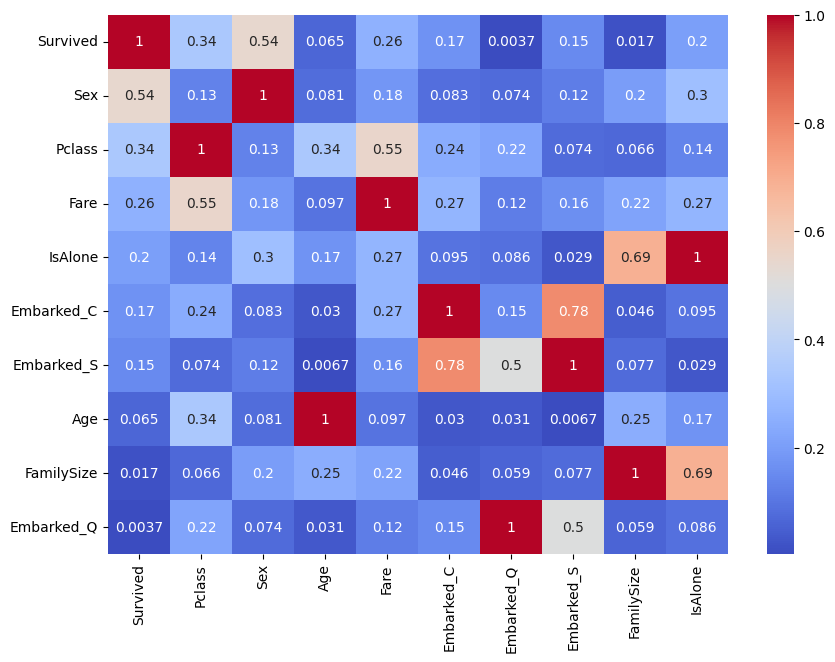

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

## 📊 Data Visualization

Data visualization helps uncover patterns, trends, and relationships in the dataset. It allows us to visually understand how certain features relate to survival and can guide feature engineering and model selection.

We will use `matplotlib` and `seaborn` for creating visual plots.

⚠️**NOTE** Check out columns describtion cell to see what each column value represents.

In [21]:
survived_rate = df['Survived'].value_counts()/len(df)
survived_rate

,count
Survived,
0,0.616162
1,0.383838


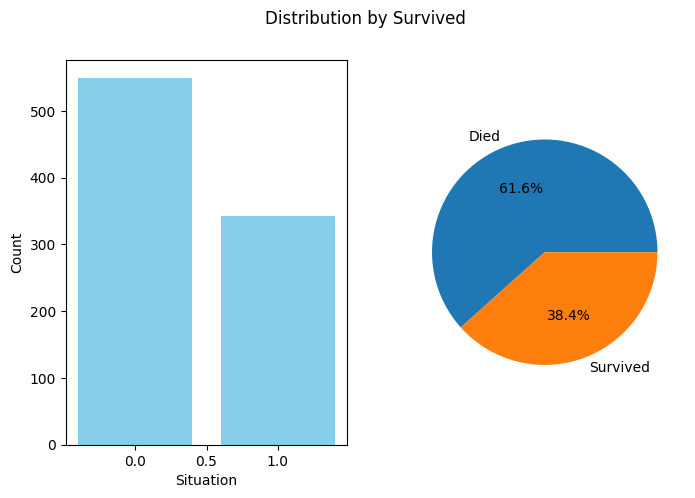

In [22]:
classes = df['Survived'].value_counts()
fig, ax = plt.subplots(1,2, figsize=(8,5))

# 1-grafig Bar plot
ax[0].bar(classes.index, classes.values, color='skyblue')
ax[0].set_xlabel("Situation")
ax[0].set_ylabel("Count")

# 2-grafig Pie chart
ax=ax[1].pie(classes.values, labels=['Died', 'Survived'], autopct='%1.1f%%')

plt.suptitle("Distribution by Survived")
plt.show()

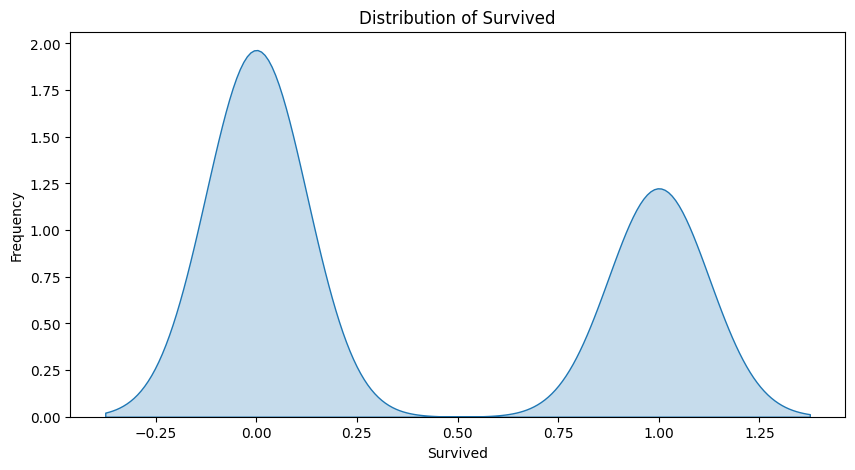

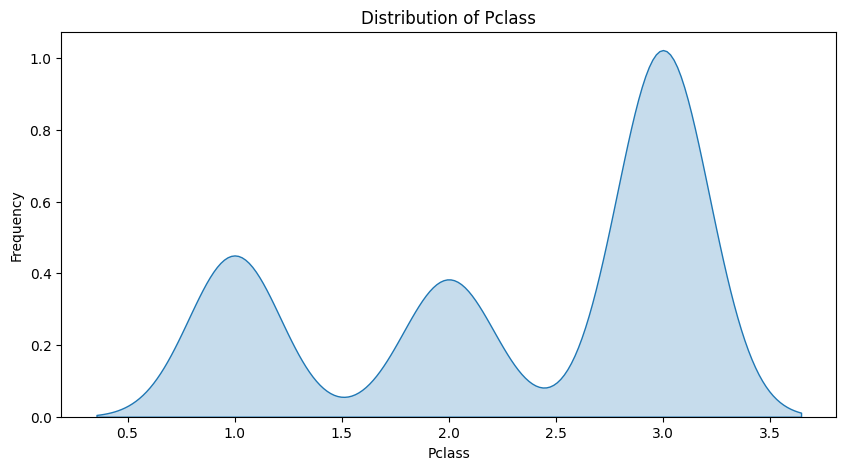

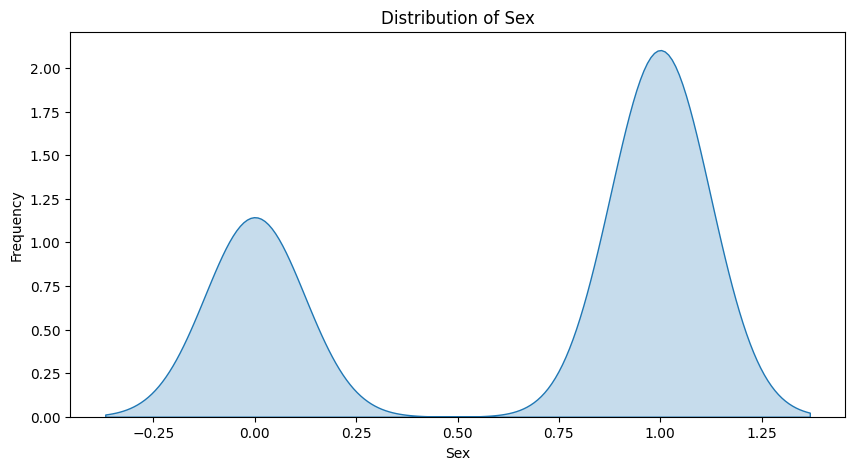

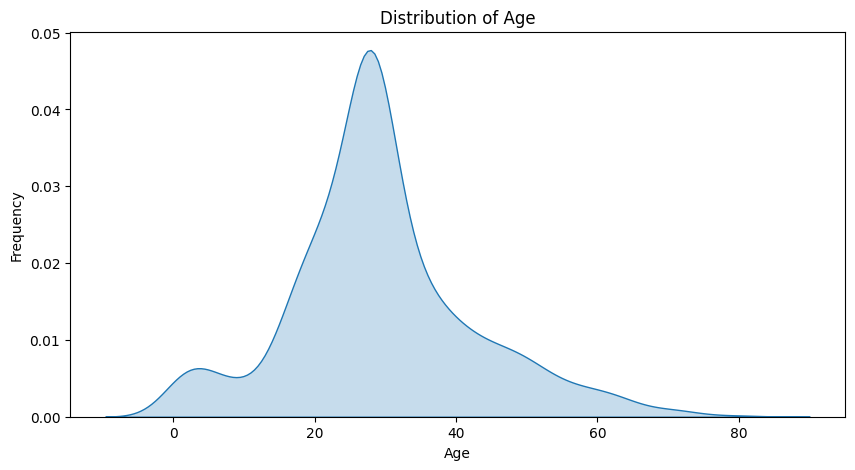

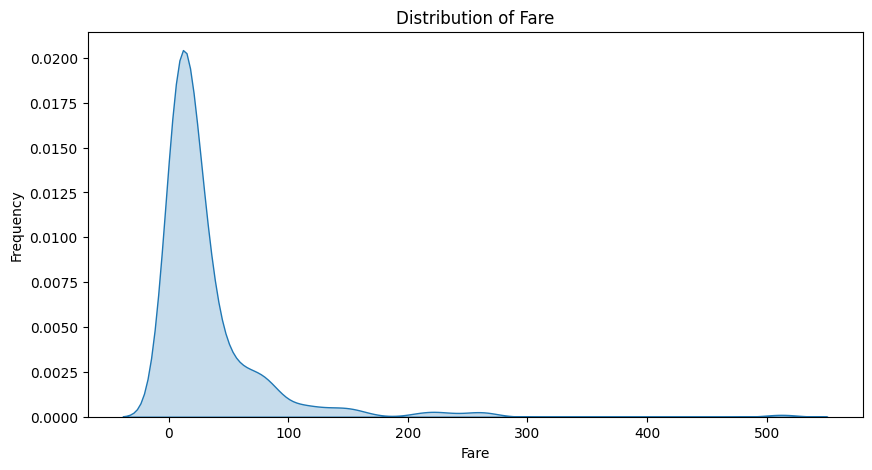

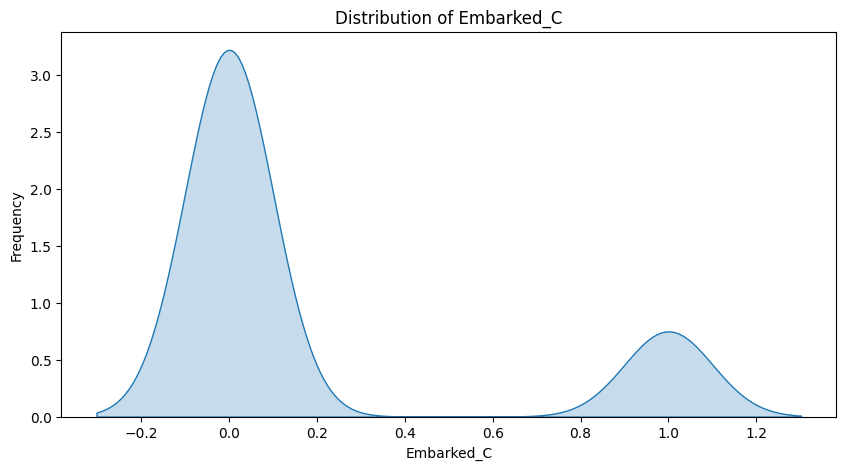

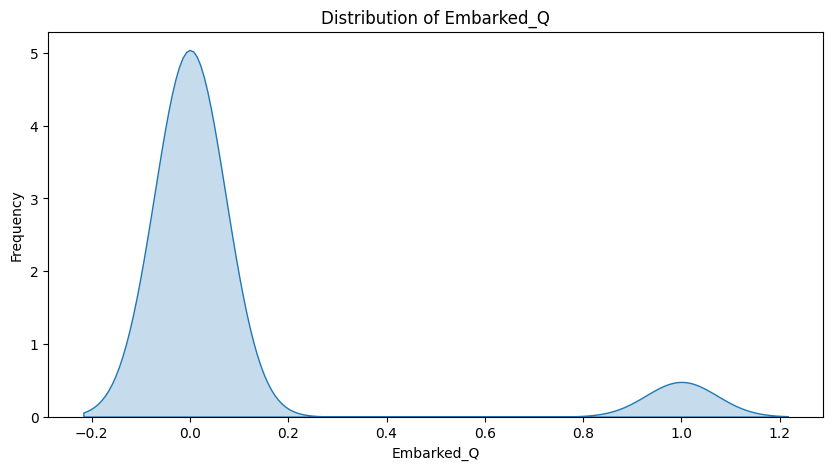

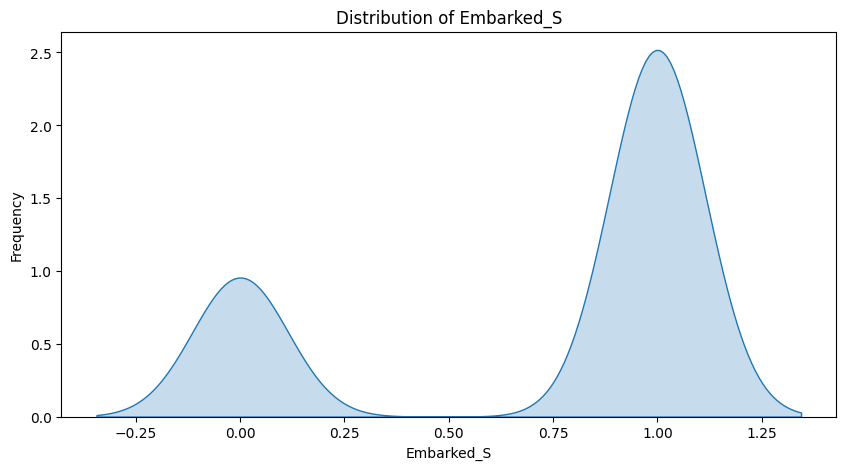

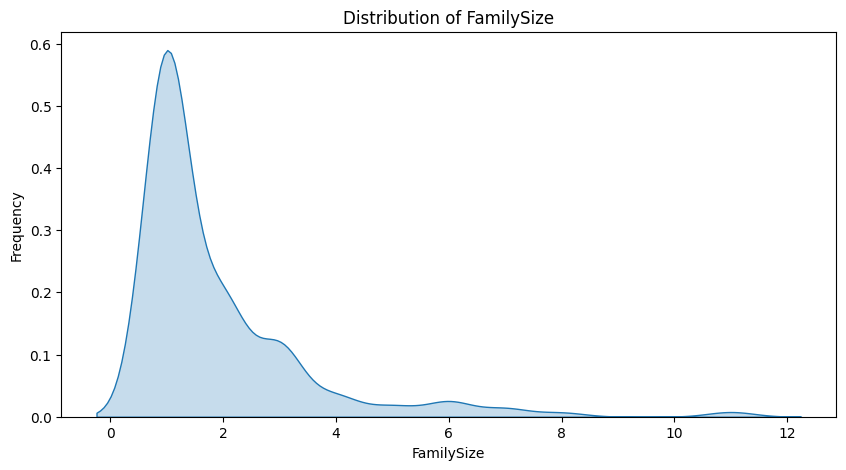

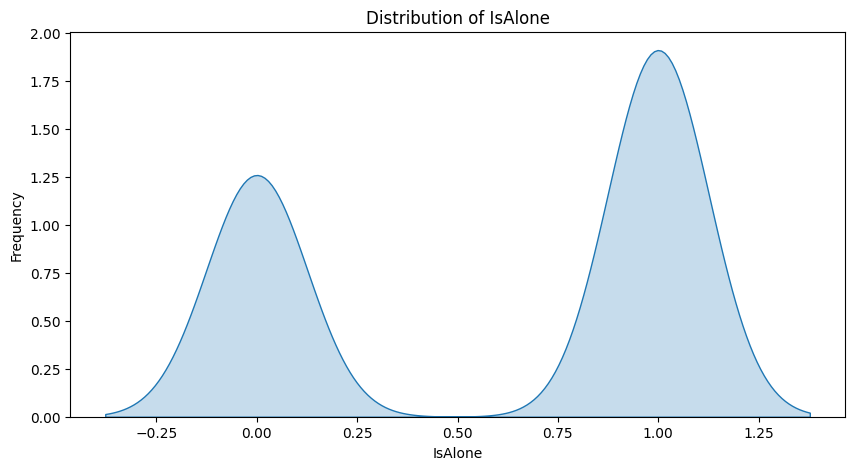

In [23]:
for num_col in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[num_col], fill=True)
    plt.title(f'Distribution of {num_col}')
    plt.xlabel(num_col)
    plt.ylabel('Frequency')
    plt.show()

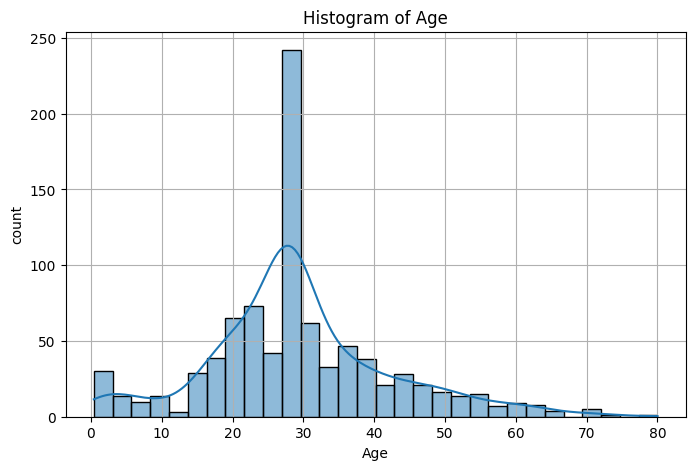

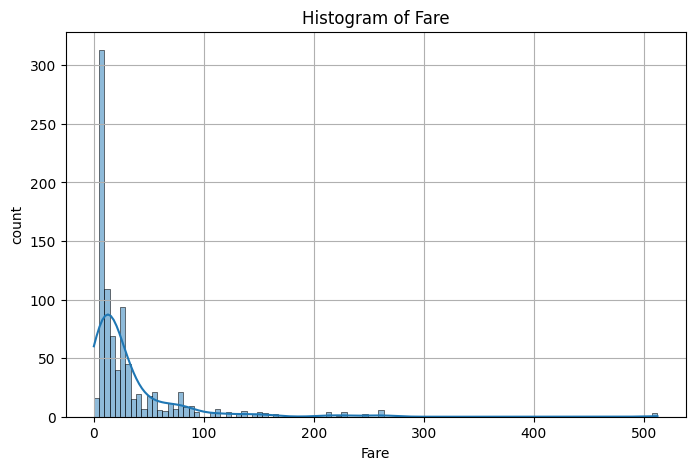

In [24]:
# visualization of numerical columns
for col in df[['Age', 'Fare']]:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("count")
    plt.grid(True)
    plt.show()

# ML

### Preparation for ML

In [25]:
df.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,A/5 21171,7.2500,0,0,1,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,PC 17599,71.2833,1,0,0,2,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,STON/O2. 3101282,7.9250,0,0,1,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,113803,53.1000,0,0,1,2,0
5,0,3,"Allen, Mr. William Henry",1,35.0,373450,8.0500,0,0,1,1,1


In [26]:
# dropping categorical columns
df_for_ml = df.drop(columns=['Name','Ticket'], axis=1)

In [27]:
X = df_for_ml.drop('Survived', axis=1)
y = df_for_ml['Survived']

In [28]:
# for catboost classifier
X1 = df.drop('Survived', axis=1)
y1 = df['Survived']

In [29]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X1, y1, test_size=0.10, random_state=42) # for catboost classifier

In [30]:
# scaling the data
scaler = RobustScaler()
scaler

RobustScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# drop categorical columns for scaler
X_train_cat1 = X_train_cat.drop(columns=['Name', 'Ticket'], axis=1)
X_test_cat1 = X_test_cat.drop(columns=['Name', 'Ticket'], axis=1)

# scaling for catboost
X_train_cat1 = scaler.fit_transform(X_train_cat1)
X_test_cat1 = scaler.transform(X_test_cat1)

In [33]:
# making dataframe after scaling for catboost
X_train_cat_columns = X_train_cat.select_dtypes(include=['int64', 'float64']).columns
X_train_cat2 = pd.DataFrame(X_train_cat1, columns=X_train_cat_columns, index=X_train_cat.index)

X_test_cat_columns = X_test_cat.select_dtypes(include=['int64', 'float64']).columns
X_test_cat2 = pd.DataFrame(X_test_cat1, columns=X_test_cat_columns, index=X_test_cat.index)

X_train_cat = pd.concat([X_train_cat2, X_train_cat.select_dtypes(include=['object'])], axis=1)
X_test_cat = pd.concat([X_test_cat2, X_test_cat.select_dtypes(include=['object'])], axis=1)

In [34]:
X_test_cat

,Pclass,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize,IsAlone,Name,Ticket
PassengerId,,,,,,,,,,,
710,0.0,0.0,0.000000,0.035065,1.0,0.0,-1.0,2.0,-1.0,"Moubarek, Master. Halim Gonios (""William George"")",2661
440,-1.0,0.0,0.230769,-0.175158,0.0,0.0,0.0,0.0,0.0,"Kvillner, Mr. Johan Henrik Johannesson",C.A. 18723
841,0.0,0.0,-0.615385,-0.289223,0.0,0.0,0.0,0.0,0.0,"Alhomaki, Mr. Ilmari Rudolf",SOTON/O2 3101287
721,-1.0,-1.0,-1.692308,0.821519,0.0,0.0,0.0,1.0,-1.0,"Harper, Miss. Annie Jessie ""Nina""",248727
40,0.0,-1.0,-1.076923,-0.142303,1.0,0.0,-1.0,1.0,-1.0,"Nicola-Yarred, Miss. Jamila",2651
...,...,...,...,...,...,...,...,...,...,...,...
494,-2.0,0.0,3.307692,1.552602,1.0,0.0,-1.0,0.0,0.0,"Artagaveytia, Mr. Ramon",PC 17609
216,-2.0,-1.0,0.230769,4.377444,1.0,0.0,-1.0,1.0,-1.0,"Newell, Miss. Madeleine",35273
310,-2.0,-1.0,0.153846,1.881506,1.0,0.0,-1.0,0.0,0.0,"Francatelli, Miss. Laura Mabel",PC 17485


In [35]:
X_train.shape

(801, 9)

In [36]:
X_test.shape

(90, 9)

## RandomForest

In [37]:
rf_clf = RandomForestClassifier(max_features='sqrt', max_depth=5)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [38]:
y_predict = rf_clf.predict(X_test)

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.89      0.86        54
           1       0.82      0.75      0.78        36

    accuracy                           0.83        90
   macro avg       0.83      0.82      0.82        90
weighted avg       0.83      0.83      0.83        90

Accurcy: 83.3%
Precision: 81.8%
Recall: 75.0%
f1_score: 78.3%


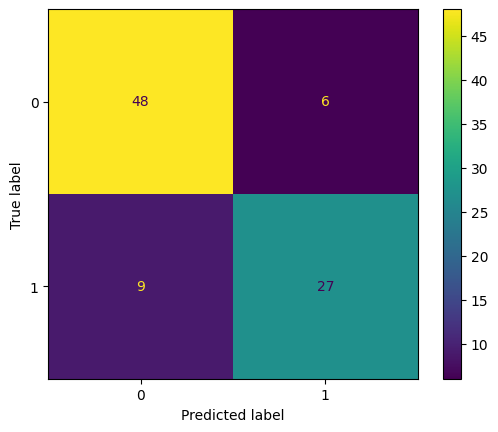

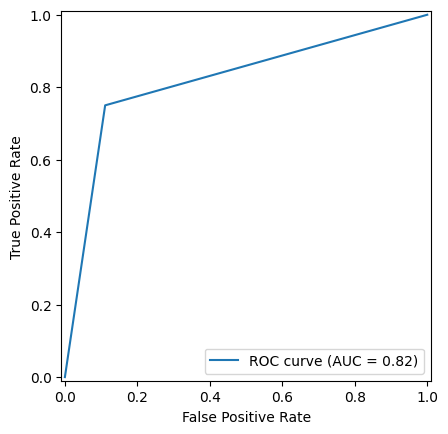

In [39]:
print(f"Classification Report: {metrics.classification_report(y_test, y_predict)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_predict)*100:.1f}%")
print(f'Precision: {metrics.precision_score(y_test, y_predict)*100:.1f}%')
print(f'Recall: {metrics.recall_score(y_test, y_predict)*100:.1f}%')
print(f'f1_score: {metrics.f1_score(y_test, y_predict)*100:.1f}%')

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## XGBoost

In [40]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
y_predict = xgboost.predict(X_test)

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.80      0.83        54
           1       0.73      0.83      0.78        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90

Accurcy: 81.1%
Precision: 73.2%
Recall: 83.3%
f1_score: 77.9%


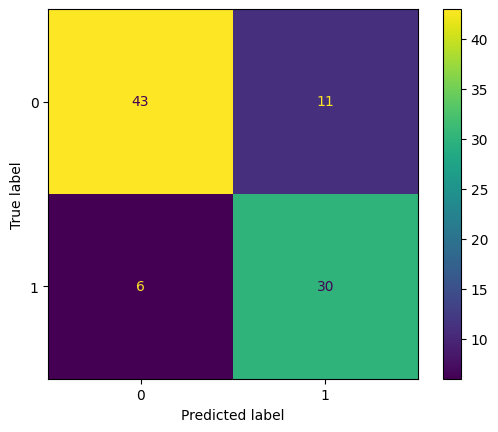

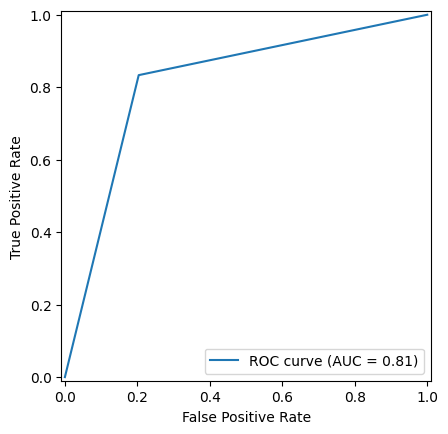

In [42]:
print(f"Classification Report: {metrics.classification_report(y_test, y_predict)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_predict)*100:.1f}%")
print(f'Precision: {metrics.precision_score(y_test, y_predict)*100:.1f}%')
print(f'Recall: {metrics.recall_score(y_test, y_predict)*100:.1f}%')
print(f'f1_score: {metrics.f1_score(y_test, y_predict)*100:.1f}%')

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## DecisionTree

In [43]:
d_tree = DecisionTreeClassifier(max_depth=20)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

In [44]:
y_predict = d_tree.predict(X_test)

Classification Report:               precision    recall  f1-score   support

           0       0.87      0.72      0.79        54
           1       0.67      0.83      0.74        36

    accuracy                           0.77        90
   macro avg       0.77      0.78      0.76        90
weighted avg       0.79      0.77      0.77        90

Accurcy: 76.7%
Precision: 66.7%
Recall: 83.3%
f1_score: 74.1%


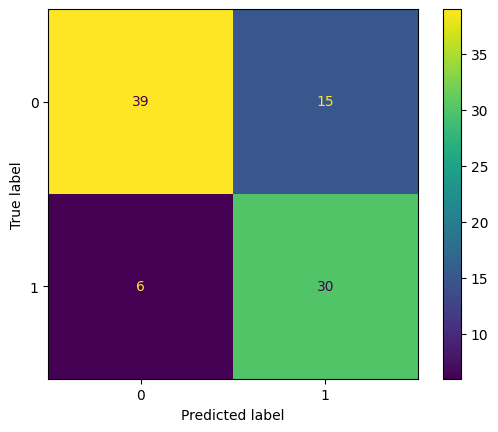

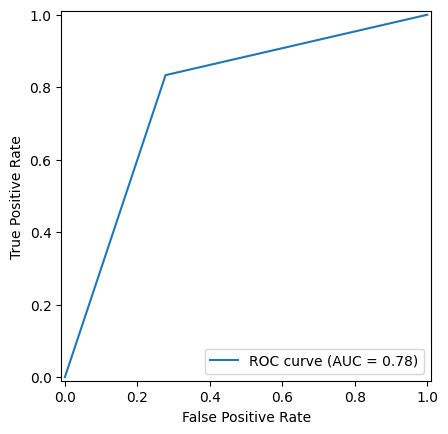

In [45]:
print(f"Classification Report: {metrics.classification_report(y_test, y_predict)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_predict)*100:.1f}%")
print(f'Precision: {metrics.precision_score(y_test, y_predict)*100:.1f}%')
print(f'Recall: {metrics.recall_score(y_test, y_predict)*100:.1f}%')
print(f'f1_score: {metrics.f1_score(y_test, y_predict)*100:.1f}%')

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

In [46]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier(
    categorical_features="from_dtype", random_state=42
).fit(X_train, y_train)
model

HistGradientBoostingClassifier(random_state=42)

In [47]:
y_predict = model.predict(X_test)

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.83      0.87        54
           1       0.78      0.89      0.83        36

    accuracy                           0.86        90
   macro avg       0.85      0.86      0.85        90
weighted avg       0.86      0.86      0.86        90

Accurcy: 85.6%
Precision: 78.0%
Recall: 88.9%
f1_score: 83.1%


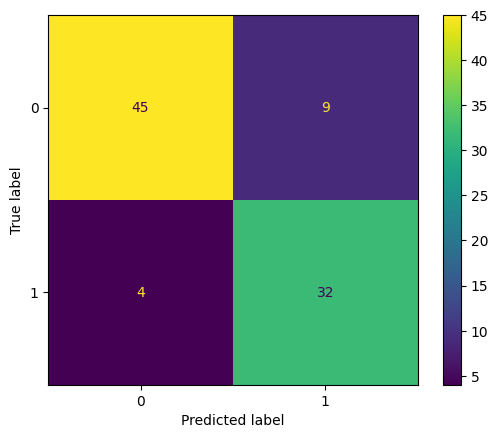

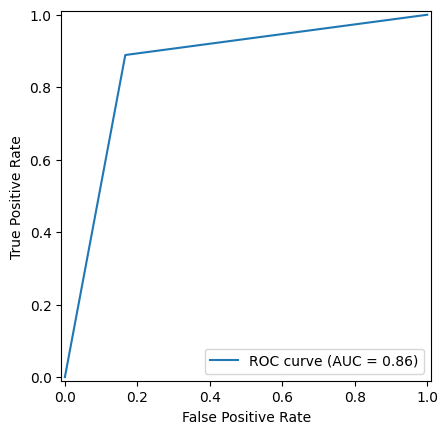

In [48]:
print(f"Classification Report: {metrics.classification_report(y_test, y_predict)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_predict)*100:.1f}%")
print(f'Precision: {metrics.precision_score(y_test, y_predict)*100:.1f}%')
print(f'Recall: {metrics.recall_score(y_test, y_predict)*100:.1f}%')
print(f'f1_score: {metrics.f1_score(y_test, y_predict)*100:.1f}%')

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## CatBoost

In [49]:
# model
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    auto_class_weights='Balanced',
    cat_features=categorical_features,
    eval_metric='AUC',
    early_stopping_rounds=50,
    task_type='CPU',
    verbose=100,
    random_seed=42)
# model training
model.fit(
    X_train_cat, y_train_cat,
    eval_set=(X_test_cat, y_test_cat),
    use_best_model=True
)

0:	test: 0.9032922	best: 0.9032922 (0)	total: 63.8ms	remaining: 1m 3s
100:	test: 0.9207819	best: 0.9212963 (99)	total: 1.24s	remaining: 11s
200:	test: 0.9295267	best: 0.9295267 (179)	total: 2.06s	remaining: 8.18s
300:	test: 0.9351852	best: 0.9356996 (279)	total: 3.03s	remaining: 7.03s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9377572016
bestIteration = 334

Shrink model to first 335 iterations.


In [50]:
y_predict = model.predict(X_test_cat)

Classification Report:               precision    recall  f1-score   support

           0       0.92      0.81      0.86        54
           1       0.76      0.89      0.82        36

    accuracy                           0.84        90
   macro avg       0.84      0.85      0.84        90
weighted avg       0.85      0.84      0.85        90

Accurcy: 84.4%
Precision: 76.2%
Recall: 88.9%
f1_score: 82.1%


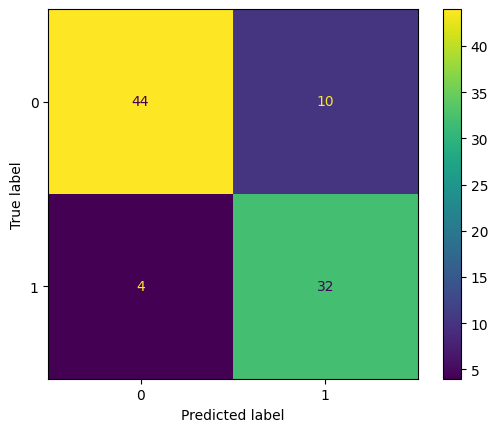

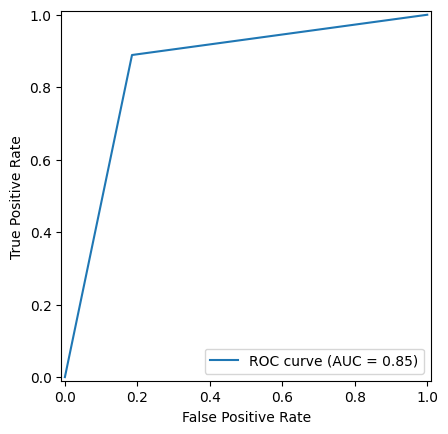

In [51]:
print(f"Classification Report: {metrics.classification_report(y_test, y_predict)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_predict)*100:.1f}%")
print(f'Precision: {metrics.precision_score(y_test, y_predict)*100:.1f}%')
print(f'Recall: {metrics.recall_score(y_test, y_predict)*100:.1f}%')
print(f'f1_score: {metrics.f1_score(y_test, y_predict)*100:.1f}%')

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## Logistic Regression

In [52]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_predict = lr_model.predict(X_test)

Classification Report:               precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90

Accurcy: 84.4%
Precision: 78.9%
Recall: 83.3%
f1_score: 81.1%


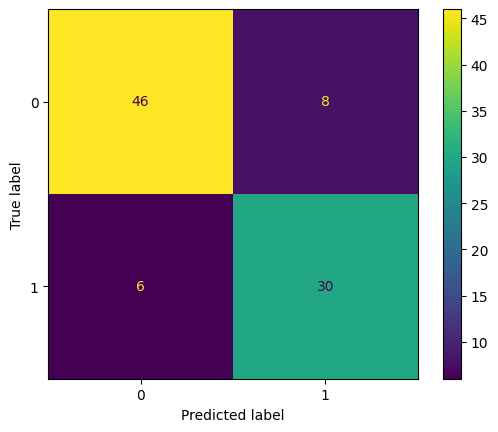

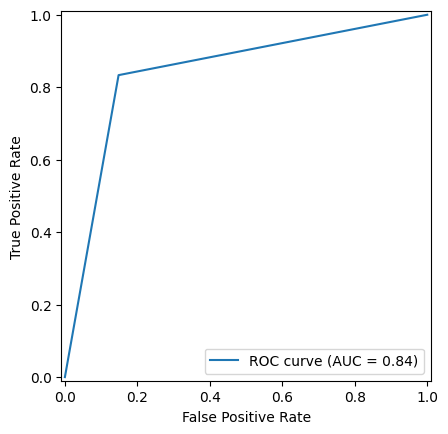

In [54]:
print(f"Classification Report: {metrics.classification_report(y_test, y_predict)}")
print(f"Accurcy: {metrics.accuracy_score(y_test, y_predict)*100:.1f}%")
print(f'Precision: {metrics.precision_score(y_test, y_predict)*100:.1f}%')
print(f'Recall: {metrics.recall_score(y_test, y_predict)*100:.1f}%')
print(f'f1_score: {metrics.f1_score(y_test, y_predict)*100:.1f}%')

# confusion metrics
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_predict)
plt.show()
print("\n")

# ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name="ROC curve")
display.plot()
plt.show()

## Let’s now use the RandomForestClassifier for predicting proba, whose PR curve and F1 score we can compare to those of the DecisionTreeClassifier:

In [55]:
# random forest probabilities
from sklearn.model_selection import cross_val_predict
y_probas_forest = cross_val_predict(rf_clf, X_train, y_train, cv=3,
                                    method="predict_proba")

In [56]:
y_probas_forest[:2]

array([[0.64278438, 0.35721562],
       [0.79969418, 0.20030582]])

In [57]:
# precision_recall_curve
y_scores_forest = y_probas_forest[:, 1]
precisions_forest, recalls_forest, thresholds_forest = metrics.precision_recall_curve(
y_train, y_scores_forest)

In [58]:
# decision tree probabilities
y_probas_tree = cross_val_predict(d_tree, X_train, y_train, cv=3,
                                    method="predict_proba")
y_probas_tree[:2]

array([[1., 0.],
       [1., 0.]])

In [59]:
# precision_recall_curve
y_scores_tree = y_probas_tree[:, 1]
precisions, recalls, thresholds = metrics.precision_recall_curve(
y_train, y_scores_tree)

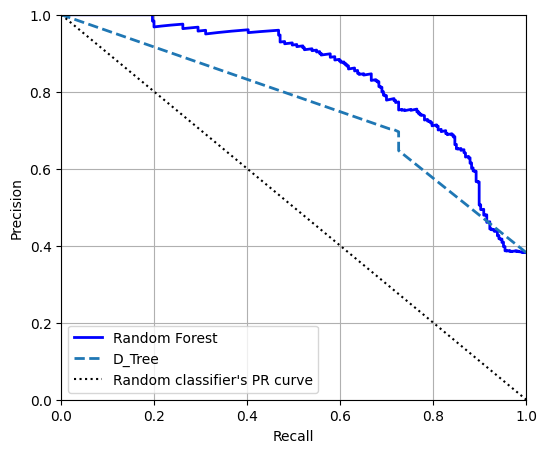

In [60]:
plt.figure(figsize=(6, 5))
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="D_Tree")
plt.plot([0,1], [1,0], 'k:', label="Random classifier's PR curve") # Corrected line
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
plt.show()

In [61]:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5
metrics.f1_score(y_train, y_train_pred_forest)

0.7404718693284936

In [62]:
metrics.roc_auc_score(y_train, y_scores_forest)

np.float64(0.8593846966395986)

## Find the index where precision is >= 0.90 for the Random Forest model

In [63]:
# Find the index where precision is >= 0.90 for the Random Forest model
indices_for_90_precision = np.where(precisions_forest >= 0.90)[0]

# Check if there is any threshold that achieves at least 0.90 precision
if len(indices_for_90_precision) > 0:
    idx_for_90_precision = indices_for_90_precision[0]
    threshold_for_90_precision = thresholds_forest[idx_for_90_precision]
    print(f"Threshold for at least 90% precision (Random Forest): {threshold_for_90_precision}")
else:
    print("No threshold achieves at least 90% precision for the Random Forest model.")

# Recalculate y_train_pred_forest using the found threshold (if applicable)
# If no threshold achieves 90% precision, you might want to handle this case differently
if len(indices_for_90_precision) > 0:
    y_train_pred_forest = (y_scores_forest >= threshold_for_90_precision)
    print(f"F1 score with threshold {threshold_for_90_precision}: {metrics.f1_score(y_train, y_train_pred_forest)}")
else:
    # Handle the case where no threshold meets the precision requirement,
    # perhaps by using the original threshold of 0.5 or a different strategy
    print("Cannot calculate F1 score at 90% precision as no such threshold exists.")
    y_train_pred_forest = (y_scores_forest >= 0.5) # Using default threshold for demonstration
    print(f"F1 score with default threshold 0.5: {metrics.f1_score(y_train, y_train_pred_forest)}")

Threshold for at least 90% precision (Random Forest): 0.6233217643332148
F1 score with threshold 0.6233217643332148: 0.6895161290322581


In [64]:
threshold_for_90_precision

np.float64(0.6233217643332148)

In [65]:
y_train_pred_90 = (y_scores_forest >= threshold_for_90_precision)

In [66]:
y_train_pred_90

array([False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False, False,  True,  True,  True, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False,  True, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True,  True, False,
        True, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,

In [67]:
metrics.precision_score(y_train, y_train_pred_90)

0.9

In [68]:
metrics.recall_score(y_train, y_train_pred_90)

0.5588235294117647

In [69]:
from sklearn.base import BaseEstimator, ClassifierMixin

class CustomThresholdClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_model, threshold=0.5):
        self.base_model = base_model
        self.threshold = threshold

    def fit(self, X, y):
        self.base_model.fit(X, y)
        return self

    def predict(self, X):
        proba = self.base_model.predict_proba(X)[:, 1]
        return (proba >= self.threshold).astype(int)

    def predict_proba(self, X):
        return self.base_model.predict_proba(X)

    def set_threshold(self, threshold):
        self.threshold = threshold

    def get_threshold(self):
        return self.threshold


In [71]:
# Assuming you have already created and trained your custom_model
# and calculated the threshold for 95% precision (e.g., threshold_for_90_precision)

# Create an instance of the CustomThresholdClassifier
custom_model = CustomThresholdClassifier(base_model=rf_clf, threshold=0.623)

# Set the desired threshold on your custom_model instance
custom_model.set_threshold(threshold_for_90_precision) # Use the threshold you found for 95% precision

# Save the custom_model with the new threshold
joblib.dump(custom_model, "custom_model_with_95_precision.jbl")

print("Custom model with 95% precision threshold saved successfully!")

Custom model with 95% precision threshold saved successfully!


Precision of the loaded custom model: 89.3%
Recall of the loaded custom model: 69.4%
F1 Score of the loaded custom model: 78.1%
Accuracy of the loaded custom model: 84.4%


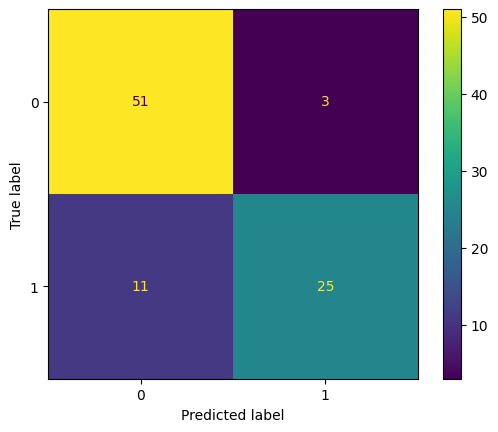

In [72]:
# Load the custom model with the 95% precision threshold
loaded_custom_model = joblib.load("custom_model_with_95_precision.jbl")

# Make predictions on the test set using the loaded model
y_pred_loaded = loaded_custom_model.predict(X_test)

# Evaluate the precision of the loaded model
precision_loaded = metrics.precision_score(y_test, y_pred_loaded)

print(f"Precision of the loaded custom model: {precision_loaded*100:.1f}%")
print(f"Recall of the loaded custom model: {metrics.recall_score(y_test, y_pred_loaded)*100:.1f}%")
print(f"F1 Score of the loaded custom model: {metrics.f1_score(y_test, y_pred_loaded)*100:.1f}%")
print(f"Accuracy of the loaded custom model: {metrics.accuracy_score(y_test, y_pred_loaded)*100:.1f}%")

metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_loaded)
plt.show()